In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

df = pd.read_csv('heart.csv')

selected_features = ['age', 'sex', 'cp', 'chol', 'thalach', 'oldpeak', 'target']
df = df[selected_features]

df = pd.get_dummies(df, columns=['sex', 'cp'])

scaler = StandardScaler()
columns_to_scale = ['age', 'chol', 'thalach', 'oldpeak']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

X = df.drop(['target'], axis=1)
y = df['target']

knn_classifier = KNeighborsClassifier(n_neighbors=12)
knn_classifier.fit(X, y)

randomforest_classifier = RandomForestClassifier(n_estimators=10)
randomforest_classifier.fit(X, y)

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X, y)

def predict_heart_disease():
    print("Please answer the following questions to predict the likelihood of heart disease.")
    age = float(input("Enter your age (in years, between 20 and 90): "))
    sex = int(input("Enter your sex (0 for female, 1 for male): "))
    cp = int(input("Do you experience chest pain? (0 for typical angina, 1 for atypical angina, 2 for non-anginal pain, 3 for asymptomatic): "))
    chol = float(input("Enter your serum cholesterol level (in mg/dl, between 100 and 600): "))
    thalach = float(input("Enter your maximum heart rate achieved (in bpm, between 70 and 210): "))
    oldpeak = float(input("Enter the ST depression induced by exercise relative to rest (in mm, between 0 and 7): "))

    input_data = np.array([[age, sex, cp, chol, thalach, oldpeak, 0, 0, 0, 0]])
    
    input_data[:, [0, 3, 4, 5]] = scaler.transform(input_data[:, [0, 3, 4, 5]])

    knn_prediction = knn_classifier.predict(input_data)[0]
    print("KNN Model Prediction:", "Heart Disease" if knn_prediction == 1 else "No Heart Disease")

    rf_prediction = randomforest_classifier.predict(input_data)[0]
    print("Random Forest Model Prediction:", "Heart Disease" if rf_prediction == 1 else "No Heart Disease")

    svm_prediction = svm_classifier.predict(input_data)[0]
    print("SVM Model Prediction:", "Heart Disease" if svm_prediction == 1 else "No Heart Disease")

# Call the function to make predictions
predict_heart_disease()


Please answer the following questions to predict the likelihood of heart disease.


Enter your age (in years, between 20 and 90):  30
Enter your sex (0 for female, 1 for male):  1
Do you experience chest pain? (0 for typical angina, 1 for atypical angina, 2 for non-anginal pain, 3 for asymptomatic):  2
Enter your serum cholesterol level (in mg/dl, between 100 and 600):  200
Enter your maximum heart rate achieved (in bpm, between 70 and 210):  90
Enter the ST depression induced by exercise relative to rest (in mm, between 0 and 7):  1


KNN Model Prediction: Heart Disease
Random Forest Model Prediction: Heart Disease
SVM Model Prediction: Heart Disease


C:\Users\Abhinav Raja Raizada\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Abhinav Raja Raizada\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Abhinav Raja Raizada\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Abhinav Raja Raizada\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


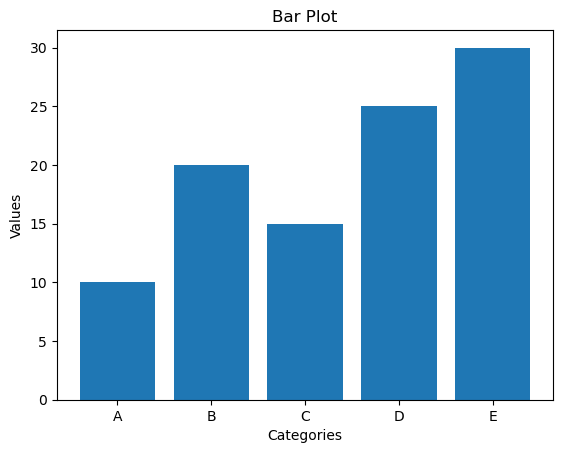

In [3]:
import matplotlib.pyplot as plt

# Data
x = ['A', 'B', 'C', 'D', 'E']
y = [10, 20, 15, 25, 30]

# Plot
plt.bar(x, y)
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Plot')
plt.show()


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, classification_report

# Sample data for demonstration purposes
y_true = np.array([0, 1, 0, 1, 1, 0, 1, 0, 0, 1])  # True labels
y_pred_prob = np.array([0.1, 0.8, 0.3, 0.7, 0.9, 0.2, 0.6, 0.4, 0.2, 0.7])  # Predicted probabilities for positive class
y_pred = np.array([0, 1, 0, 1, 1, 0, 1, 0, 0, 1])  # Predicted labels

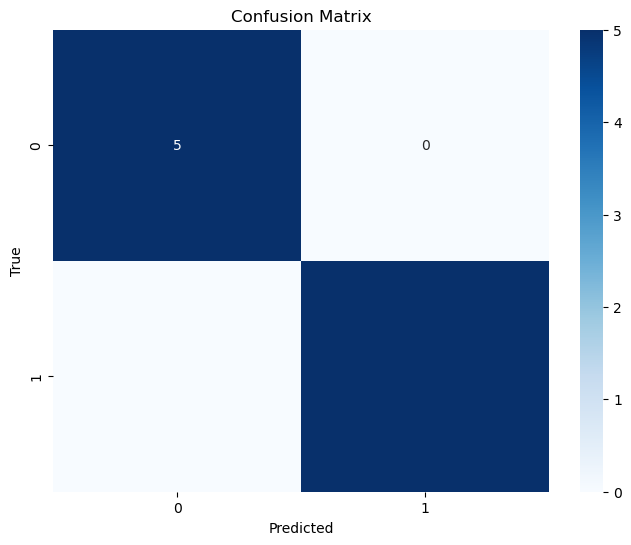

In [8]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

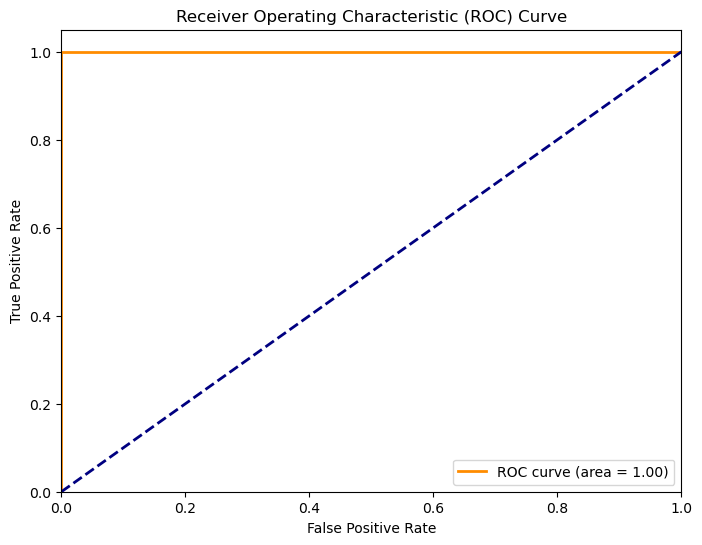

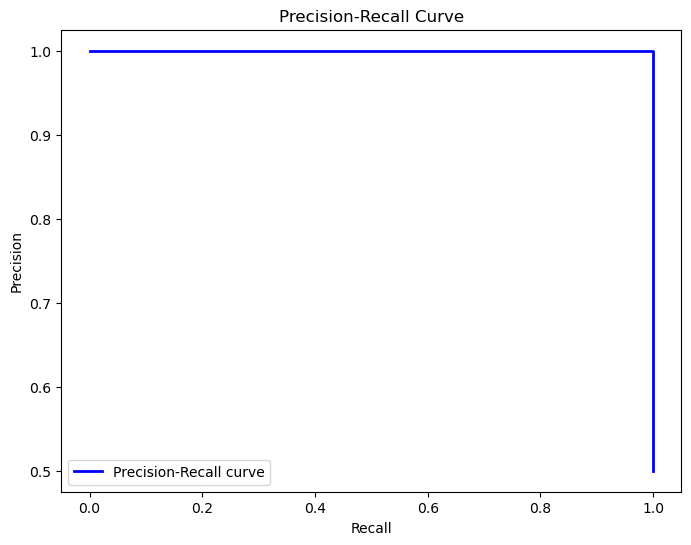

In [10]:
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

precision, recall, _ = precision_recall_curve(y_true, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

In [11]:
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

